# Stokastiske variable

Vi får oppgitt en stokastisk variabel X som er summen når vi slår to rettferdige $D_8$-terninger. La oss se på noe av det vi kan finne ut for denne stokastiske variabelen.

## Tabell over sannsynligheter
Under henter vi inn DataFrame, og importerer numpy. Videre lages en hjelpevariabel for antall sider på terningen, altså 8. Vi trenger en liste over sannsynlighetene som er dobbelt så lang som antall sider på terningen. Siden Python bruker 0-indekserte lister (første element er indeks 0, andre element er 1 osv), må vi ha en ekstra plass i "sanns"-listen. Vi bruker numpy sin "zeros"-metode for å få en liste med bare 0-ere.

Nå løper vi så gjennom mulighetene for terningene a og b, og summerer. Vi løper fra 1 til og med antall sider. "range" i Python går, som sett tidligere, opp til n-1, så vi legger på en her også.

Etter dette har vi en liste med antall forekomster av de ulike summene. Prøv gjerne å printe "sanns" og se selv. Til slutt lager vi en DataFrame fra dataene våre. Merk at vi bruker sanns[2:] for å ikke ta med de to første elementene i listen. Disse vil alltid være 0 (ingen kombinasjoner av to terninger gir 0 eller 1). Vi deler også på summen av sannsynlighetene for å få en normalisert tabell.

In [1]:
from pandas import DataFrame
import numpy as np

ant_sider = 8
sanns = np.zeros(ant_sider*2+1)

for a in range(1, ant_sider+1):
    for b in range(1, ant_sider+1):
        sanns[a+b] += 1
        
norm_data = sanns[2:]/sum(sanns)
indekser = range(2,ant_sider*2+1)

df = DataFrame(
    data=norm_data,
    index=indekser,
    columns=['Sannsynlighet']
)

df

,Sannsynlighet
2,0.015625
3,0.031250
4,0.046875
5,0.062500
6,0.078125
7,0.093750
8,0.109375
9,0.125000
10,0.109375
11,0.093750


## Sannsynlighetsdiagram

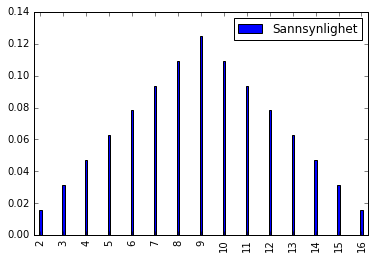

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot.bar(width=0.1)

plt.show()

## Forventning, varians og standardavvik

Istedenfor å regne ut forventning, varians osv. selv, kan vi lage vår egen diskrete sannsynlighetsfordeling ut fra sannsynlighetene vi fant over. Vi kan importere rv_discrete (finnes tilsvarende for kontinuerlige fordelinger), og bruke denne direkte. Her lager vi en d8_fordeling som tar inn de diskrete verdiene (indekser-variabelen fra tidligere), og den normaliserte listen med sannsynligheter (slik at summen er 1).

Nå har vi tilgang til alle metodene vi har brukt på de innebygde fordelingene i vår egen fordeling. Fantastisk!

In [3]:
from scipy.stats import rv_discrete

d8_fordeling = rv_discrete(
    values=(indekser, norm_data),
    name='d8_fordeling'
)

d8_fordeling.mean(), d8_fordeling.var(), d8_fordeling.std()

(9.0, 10.5, 3.2403703492039302)

Som nevnt over, kan vi også lage våre egne kontinuerlige sannsynlighetsfordelinger. Det er litt mer kode, og du kan se et eksempel under. Men husk på at selv om du lager din egen fordeling, så er den ikke nødvendigvis en sannsynlighetsfordeling! I eksempelet under, er f.eks. CDF negativ under 0, og dette er derfor ingen sannsynlighetsfordeling, selv om den går opp til 1 igjen i $\frac{\pi}{2}$.

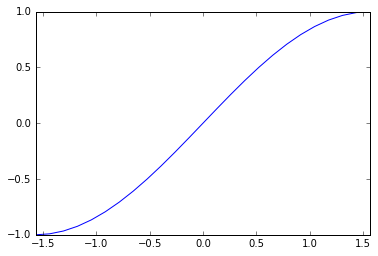

In [4]:
from scipy.stats import rv_continuous

class cos_fordeling_gen(rv_continuous):
    def _cdf(self, x):
        return [np.sin(a) if a >= -np.pi/2 and a <= np.pi/2 else 0 for a in x]
    def _pdf(self, x):
        return [np.cos(a) if a >= -np.pi/2 and a <= np.pi/2 else 0 for a in x]
    
cos_fordeling = cos_fordeling_gen(name='cos_fordeling')

vals = np.linspace(-np.pi/2, np.pi/2, 25)
df2 = DataFrame(cos_fordeling.cdf(vals), vals)

df2.plot.line(legend=None)
plt.show()

## Stokastiske flervariable

Vi setter opp en tabell over de stokastiske variablene X og Y som en dataframe.

In [5]:
df = DataFrame(
    [
        [0.1, 0.15, 0.1],
        [0.05, 0.1, 0.1],
        [0.05, 0.2, 0.15]
    ],
    columns=['X=1', 'X=2', 'X=3'],
    index=['Y=2', 'Y=3', 'Y=4']
)

df

,X=1,X=2,X=3
Y=2,0.10,0.15,0.10
Y=3,0.05,0.10,0.10
Y=4,0.05,0.20,0.15


For å lage en kumulativ tabell bruker vi "cumsum"-metoden, men vi må gjøre den to ganger. Første gang regner kumulativt nedover, og andre gangen, bortover (0 og 1 spesifiserer retning). 

In [6]:
k_df = df.cumsum(0).cumsum(1)

k_df

,X=1,X=2,X=3
Y=2,0.10,0.25,0.35
Y=3,0.15,0.40,0.60
Y=4,0.20,0.65,1.00


Vi kan finne sannsynligheten P(X+Y=5) ved å summere celler. For å finne en celle, kan vi bruke ".loc" og spesifisere indeks og kolonne for den verdien vi vil ha ut.

In [7]:
ans = df.loc['Y=4']['X=1'] + df.loc['Y=3']['X=2'] + df.loc['Y=2']['X=3']

ans

0.25

Som "på papir" kan vi også finne sannsynligheten for at X = 1 gitt at X+Y = 5.

In [8]:
df.loc['Y=4']['X=1'] / ans

0.20000000000000001